### Check input files



In [1]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


datasets/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
datasets/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
datasets/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
datasets/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
datasets/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
datasets/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
datasets/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
datasets/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
datasets/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv
datasets/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv


### Import train data and create DataFrame object

In [2]:
rawsData = pd.read_csv('datasets/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv')

print("The files have been imported")


The files have been imported


In [3]:
rawsData = rawsData.drop(['Timestamp'], axis=1)  # doesn't matter


In [4]:
LABEL = 'Label'
NORMAL = 'Benign'
FTP = 'FTP-BruteForce'
SSH = 'SSH-Bruteforce'


In [5]:
rawNormal = rawsData[rawsData[LABEL] == NORMAL]
rawFTP = rawsData[rawsData[LABEL] == FTP]
rawSSH = rawsData[rawsData[LABEL] == SSH]


In [6]:
from operator import itemgetter

FEATURE = 'Feature'
COUNT = 'Count'


def getNotDuplicatedFeatures(data):
    result = []
    for column in data.keys():
        feature = data[column]
        feature = feature.drop_duplicates()
        result.append({FEATURE: column, COUNT: feature.shape[0]})
    return sorted(result, key=itemgetter(COUNT), reverse=True)


In [7]:
def specialPrint(data):
    for feature in data:
        print('{0:17}  {1}'.format(feature[FEATURE], feature[COUNT]))


In [8]:
countedRawNormal = getNotDuplicatedFeatures(rawNormal)
countedRawSSH = getNotDuplicatedFeatures(rawFTP)
countedRawFTP = getNotDuplicatedFeatures(rawSSH)


In [9]:
specialPrint(countedRawNormal)
# Flow Byts/s        372377 v flow byte rate that is number of packets transferred per second
# Flow Pkts/s        341908 x flow packets rate that is number of packets transferred per second because it is very similar to Flow Byts/s
# Flow IAT Mean      341347 v Average time between two flows
# Fwd Pkts/s         339725 v Number of forward packets per second
# Flow Duration      333735 v Flow duration
# Flow IAT Std       322849 x Standard deviation similar to Flow IAT Mean
# Fwd IAT Mean       300433 v Average size of packet in forward direction
# Fwd IAT Tot        296550 x Total time between two packets sent in the forward direction
# Bwd Pkts/s         292606 v Number of backward packets per second
# Fwd IAT Max        255430 x Maximum time between two packets sent in the forward direction because I have Fwd IAT Mean
# Flow IAT Max       247903 x Maximum time between two packets sent in the forward direction because I have Flow IAT Mean
# Fwd IAT Std        247713 x Standard deviation time between two packets sent in the forward direction because I have Fwd IAT Mean
# Bwd IAT Mean       238666 v Mean time between two packets sent in the backward direction
# Bwd IAT Std        236571 x Standard deviation time between two packets sent in the backward direction because I have Bwd IAT Mean
# Bwd IAT Tot        236287 x Total time between two packets sent in the backward direction because I have Bwd IAT Mean
# Bwd IAT Max        168641 x Maximum time between two packets sent in the backward direction because I have Bwd IAT Mean
# Bwd IAT Min        108796 x Minimum time between two packets sent in the backward direction because I have Bwd IAT Mean
# Fwd IAT Min        89617  x Minimum time between two packets sent in the forward direction because I have Fwd IAT Mean
# Idle Mean          80419  v Mean time a flow was idle before becoming active
# Active Mean        73591  v Mean time a flow was active before becoming idle
# Active Max         71437  x Maximum time a flow was active before becoming idle because I have Active Mean
# Idle Min           69046  x Minimum time a flow was idle before becoming active because I have Idle Mean
# Flow IAT Min       66506  x Minimum time between two flows because I have Flow IAT Mean
# Idle Max           59134  x Maximum time a flow was idle before becoming active because I have Idle Mean
# Idle Std           57847  x Standard deviation time a flow was idle before becoming active because I have Idle Mean
# Active Std         55382  x Standard deviation time a flow was active before becoming idle because I have Active Mean
# Pkt Len Var        42646  v Minimum inter-arrival time of packet
# Pkt Len Std        42505  v Standard deviation length of a flow
# Active Min         38864  x Minimum time a flow was active before becoming idle because I have Active Mean
# Pkt Len Mean       35996  x Mean length of a flow because I have Pkt Len Std
# Pkt Size Avg       35646  v Average size of packet
# Bwd Pkt Len Std    28860  v Standard deviation size of packet in backward direction
# Fwd Pkt Len Std    27425  v Standard deviation size of packet in forward direction
# Bwd Pkt Len Mean   24518  x Mean size of packet in backward direction because I have Active Mean Bwd Pkt Len Std
# Bwd Seg Size Avg   24517  x Average size observed in the backward direction because I have Pkt Size Avg
# Dst Port           18567  x Destination Port
# Fwd Pkt Len Mean   17847  x Average size of packet in forward direction because I have Pkt Size Avg Pkt Len Std
# Fwd Seg Size Avg   17847  x Average size observed in the forward direction because I have Pkt Size Avg
# TotLen Bwd Pkts    15656  v Total packets in the backward direction because
# Subflow Bwd Byts   15656  v The average number of bytes in a sub flow in the backward direction because
# TotLen Fwd Pkts    5842   v Total packets in the forward direction
# Subflow Fwd Byts   5842   v The average number of bytes in a sub flow in the forward direction
# Init Bwd Win Byts  3547   x Not enough unique values
# Init Fwd Win Byts  3308   x Not enough unique values
# Bwd Header Len     1843   x Not enough unique values
# Fwd Pkt Len Max    1390   x Not enough unique values
# Fwd Header Len     1237   x Not enough unique values
# Pkt Len Max        1139   x Not enough unique values
# Tot Bwd Pkts       988    x Not enough unique values
# Subflow Bwd Pkts   988    x Not enough unique values
# Bwd Pkt Len Max    958    x Not enough unique values
# Tot Fwd Pkts       751    x Not enough unique values
# Subflow Fwd Pkts   751    x Not enough unique values
# Bwd Pkt Len Min    270    x Not enough unique values
# Fwd Pkt Len Min    112    x Not enough unique values
# Fwd Act Data Pkts  112    x Not enough unique values
# Pkt Len Min        80     x Not enough unique values
# Down/Up Ratio      33     x Not enough unique values
# Fwd Seg Size Min   10     x Not enough unique values
# Protocol           3      x Not enough unique values
# Fwd PSH Flags      2      x Not enough unique values
# FIN Flag Cnt       2      x Not enough unique values
# SYN Flag Cnt       2      x Not enough unique values
# RST Flag Cnt       2      x Not enough unique values
# PSH Flag Cnt       2      x Not enough unique values
# ACK Flag Cnt       2      x Not enough unique values
# URG Flag Cnt       2      x Not enough unique values
# ECE Flag Cnt       2      x Not enough unique values
# Bwd PSH Flags      1      x Not enough unique values
# Fwd URG Flags      1      x Not enough unique values
# Bwd URG Flags      1      x Not enough unique values
# CWE Flag Count     1      x Not enough unique values
# Fwd Byts/b Avg     1      x Not enough unique values
# Fwd Pkts/b Avg     1      x Not enough unique values
# Fwd Blk Rate Avg   1      x Not enough unique values
# Bwd Byts/b Avg     1      x Not enough unique values
# Bwd Pkts/b Avg     1      x Not enough unique values
# Bwd Blk Rate Avg   1      x Not enough unique values
# Label              1      v


Flow Byts/s        372377
Flow Pkts/s        341908
Flow IAT Mean      341347
Fwd Pkts/s         339725
Flow Duration      333735
Flow IAT Std       322849
Fwd IAT Mean       300433
Fwd IAT Tot        296550
Bwd Pkts/s         292606
Fwd IAT Max        255430
Flow IAT Max       247903
Fwd IAT Std        247713
Bwd IAT Mean       238666
Bwd IAT Std        236571
Bwd IAT Tot        236287
Bwd IAT Max        168641
Bwd IAT Min        108796
Fwd IAT Min        89617
Idle Mean          80419
Active Mean        73591
Active Max         71437
Idle Min           69046
Flow IAT Min       66506
Idle Max           59134
Idle Std           57847
Active Std         55382
Pkt Len Var        42646
Pkt Len Std        42505
Active Min         38864
Pkt Len Mean       35996
Pkt Size Avg       35646
Bwd Pkt Len Std    28860
Fwd Pkt Len Std    27425
Bwd Pkt Len Mean   24518
Bwd Seg Size Avg   24517
Dst Port           18567
Fwd Pkt Len Mean   17847
Fwd Seg Size Avg   17847
TotLen Bwd Pkts    15656
Subflow 

In [10]:
specialPrint(countedRawSSH)
# Flow Duration      54 v
# Flow Pkts/s        54 v
# Flow IAT Mean      54 v
# Flow IAT Max       54 v
# Flow IAT Min       54 v
# Fwd Pkts/s         54 v
# Bwd Pkts/s         54 v
# Flow Byts/s        2  x
# Dst Port           1  x
# Protocol           1  x
# Tot Fwd Pkts       1  x
# Tot Bwd Pkts       1  x
# TotLen Fwd Pkts    1  x
# TotLen Bwd Pkts    1  x
# Fwd Pkt Len Max    1  x
# Fwd Pkt Len Min    1  x
# Fwd Pkt Len Mean   1  x
# Fwd Pkt Len Std    1  x
# Bwd Pkt Len Max    1  x
# Bwd Pkt Len Min    1  x
# Bwd Pkt Len Mean   1  x
# Bwd Pkt Len Std    1  x
# Flow IAT Std       1  x
# Fwd IAT Tot        1  x
# Fwd IAT Mean       1  x
# Fwd IAT Std        1  x
# Fwd IAT Max        1  x
# Fwd IAT Min        1  x
# Bwd IAT Tot        1  x
# Bwd IAT Mean       1  x
# Bwd IAT Std        1  x
# Bwd IAT Max        1  x
# Bwd IAT Min        1  x
# Fwd PSH Flags      1  x
# Bwd PSH Flags      1  x
# Fwd URG Flags      1  x
# Bwd URG Flags      1  x
# Fwd Header Len     1  x
# Bwd Header Len     1  x
# Pkt Len Min        1  x
# Pkt Len Max        1  x
# Pkt Len Mean       1  x
# Pkt Len Std        1  x
# Pkt Len Var        1  x
# FIN Flag Cnt       1  x
# SYN Flag Cnt       1  x
# RST Flag Cnt       1  x
# PSH Flag Cnt       1  x
# ACK Flag Cnt       1  x
# URG Flag Cnt       1  x
# CWE Flag Count     1  x
# ECE Flag Cnt       1  x
# Down/Up Ratio      1  x
# Pkt Size Avg       1  x
# Fwd Seg Size Avg   1  x
# Bwd Seg Size Avg   1  x
# Fwd Byts/b Avg     1  x
# Fwd Pkts/b Avg     1  x
# Fwd Blk Rate Avg   1  x
# Bwd Byts/b Avg     1  x
# Bwd Pkts/b Avg     1  x
# Bwd Blk Rate Avg   1  x
# Subflow Fwd Pkts   1  x
# Subflow Fwd Byts   1  x
# Subflow Bwd Pkts   1  x
# Subflow Bwd Byts   1  x
# Init Fwd Win Byts  1  x
# Init Bwd Win Byts  1  x
# Fwd Act Data Pkts  1  x
# Fwd Seg Size Min   1  x
# Active Mean        1  x
# Active Std         1  x
# Active Max         1  x
# Active Min         1  x
# Idle Mean          1  x
# Idle Std           1  x
# Idle Max           1  x
# Idle Min           1  x
# Label              1  v


Flow Duration      54
Flow Pkts/s        54
Flow IAT Mean      54
Flow IAT Max       54
Flow IAT Min       54
Fwd Pkts/s         54
Bwd Pkts/s         54
Flow Byts/s        2
Dst Port           1
Protocol           1
Tot Fwd Pkts       1
Tot Bwd Pkts       1
TotLen Fwd Pkts    1
TotLen Bwd Pkts    1
Fwd Pkt Len Max    1
Fwd Pkt Len Min    1
Fwd Pkt Len Mean   1
Fwd Pkt Len Std    1
Bwd Pkt Len Max    1
Bwd Pkt Len Min    1
Bwd Pkt Len Mean   1
Bwd Pkt Len Std    1
Flow IAT Std       1
Fwd IAT Tot        1
Fwd IAT Mean       1
Fwd IAT Std        1
Fwd IAT Max        1
Fwd IAT Min        1
Bwd IAT Tot        1
Bwd IAT Mean       1
Bwd IAT Std        1
Bwd IAT Max        1
Bwd IAT Min        1
Fwd PSH Flags      1
Bwd PSH Flags      1
Fwd URG Flags      1
Bwd URG Flags      1
Fwd Header Len     1
Bwd Header Len     1
Pkt Len Min        1
Pkt Len Max        1
Pkt Len Mean       1
Pkt Len Std        1
Pkt Len Var        1
FIN Flag Cnt       1
SYN Flag Cnt       1
RST Flag Cnt       1
PSH Fl

In [11]:
specialPrint(countedRawFTP)
# Flow IAT Std       93937 v
# Fwd IAT Std        93819 v
# Bwd IAT Std        93819 v
# Flow Byts/s        82092 v
# Flow IAT Mean      79070 v
# Flow Pkts/s        78634 v
# Fwd IAT Mean       75752 v
# Fwd Pkts/s         74998 v
# Bwd IAT Mean       72023 v
# Bwd Pkts/s         71499 v
# Flow IAT Max       64573 v
# Fwd IAT Max        63957 v
# Bwd IAT Max        62720 v
# Fwd IAT Tot        59068 v
# Flow Duration      59000 v
# Bwd IAT Tot        58807 v
# Fwd IAT Min        518   x
# Bwd IAT Min        109   x
# Pkt Len Var        98    x
# Pkt Len Std        86    x
# Fwd Pkt Len Std    77    x
# Pkt Len Mean       77    x
# Pkt Size Avg       77    x
# Fwd Pkt Len Mean   70    x
# Fwd Seg Size Avg   70    x
# Flow IAT Min       43    x
# Fwd Header Len     15    x
# Tot Fwd Pkts       14    x
# Subflow Fwd Pkts   14    x
# TotLen Fwd Pkts    10    x
# Subflow Fwd Byts   10    x
# Bwd Header Len     9     x
# Tot Bwd Pkts       8     x
# Subflow Bwd Pkts   8     x
# Bwd Pkt Len Mean   7     x
# Bwd Pkt Len Std    7     x
# Bwd Seg Size Avg   7     x
# Init Bwd Win Byts  4     x
# TotLen Bwd Pkts    3     x
# Subflow Bwd Byts   3     x
# Fwd Act Data Pkts  3     x
# Dst Port           2     x
# Fwd Pkt Len Max    2     x
# Bwd Pkt Len Max    2     x
# Pkt Len Max        2     x
# PSH Flag Cnt       2     x
# ACK Flag Cnt       2     x
# URG Flag Cnt       2     x
# Down/Up Ratio      2     x
# Init Fwd Win Byts  2     x
# Fwd Seg Size Min   2     x
# Protocol           1     x
# Fwd Pkt Len Min    1     x
# Bwd Pkt Len Min    1     x
# Fwd PSH Flags      1     x
# Bwd PSH Flags      1     x
# Fwd URG Flags      1     x
# Bwd URG Flags      1     x
# Pkt Len Min        1     x
# FIN Flag Cnt       1     x
# SYN Flag Cnt       1     x
# RST Flag Cnt       1     x
# CWE Flag Count     1     x
# ECE Flag Cnt       1     x
# Fwd Byts/b Avg     1     x
# Bwd Byts/b Avg     1     x
# Bwd Pkts/b Avg     1     x
# Bwd Blk Rate Avg   1     x
# Active Mean        1     x
# Active Std         1     x
# Active Max         1     x
# Active Min         1     x
# Idle Mean          1     x
# Idle Std           1     x
# Idle Max           1     x
# Idle Min           1     x
# Label              1     v


Flow IAT Std       93937
Fwd IAT Std        93819
Bwd IAT Std        93819
Flow Byts/s        82092
Flow IAT Mean      79070
Flow Pkts/s        78634
Fwd IAT Mean       75752
Fwd Pkts/s         74998
Bwd IAT Mean       72023
Bwd Pkts/s         71499
Flow IAT Max       64573
Fwd IAT Max        63957
Bwd IAT Max        62720
Fwd IAT Tot        59068
Flow Duration      59000
Bwd IAT Tot        58807
Fwd IAT Min        518
Bwd IAT Min        109
Pkt Len Var        98
Pkt Len Std        86
Fwd Pkt Len Std    77
Pkt Len Mean       77
Pkt Size Avg       77
Fwd Pkt Len Mean   70
Fwd Seg Size Avg   70
Flow IAT Min       43
Fwd Header Len     15
Tot Fwd Pkts       14
Subflow Fwd Pkts   14
TotLen Fwd Pkts    10
Subflow Fwd Byts   10
Bwd Header Len     9
Tot Bwd Pkts       8
Subflow Bwd Pkts   8
Bwd Pkt Len Mean   7
Bwd Pkt Len Std    7
Bwd Seg Size Avg   7
Init Bwd Win Byts  4
TotLen Bwd Pkts    3
Subflow Bwd Byts   3
Fwd Act Data Pkts  3
Dst Port           2
Fwd Pkt Len Max    2
Bwd Pkt Len Max 

In [103]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


def showAttackDistribution(data):
    counted = data.value_counts()

    fig = go.Figure(data=[
        go.Bar(name=NORMAL,
               y=[counted[NORMAL]],
               x=[NORMAL],
               text=str(counted[NORMAL]),
               orientation='v',
               textposition='outside',),
        go.Bar(name=FTP,
               y=[counted[FTP]],
               x=[FTP],
               text=str(counted[FTP]),
               orientation='v',
               textposition='outside',),
        go.Bar(name=SSH,
               y=[counted[SSH]],
               x=[SSH],
               text=str(counted[SSH]),
               orientation='v',
               textposition='outside',)
    ])
    # Change the bar mode
    fig.update_layout(
        width=1600,
        height=1200,
        title=f'Labels distribution',
        yaxis_title='<b>Number of packets<b>',
        xaxis_title='<b>Packet type<b>',
        font=dict(size=32))
    fig.update_layout(showlegend=False)
    iplot(fig)


In [104]:
showAttackDistribution(rawsData['Label'])


In [14]:
selectedFeatures = [
    # Selected from Benign
    'Flow Byts/s',
    'Flow IAT Mean',
    'Fwd Pkts/s',
    'Flow Duration',
    'Fwd IAT Mean',
    'Bwd Pkts/s',
    'Bwd IAT Mean',
    'Idle Mean',
    'Active Mean',
    'Pkt Len Var',
    'Pkt Len Std',
    'Pkt Size Avg',
    'Bwd Pkt Len Std',
    'Fwd Pkt Len Std',
    'TotLen Bwd Pkts',
    'Subflow Bwd Byts',
    'TotLen Fwd Pkts',
    'Subflow Fwd Byts',
    'Label',
    # Selected from SSH
    'Flow Duration',
    'Flow Pkts/s',
    'Flow IAT Mean',
    # 'Flow IAT Max',
    # 'Flow IAT Min',
    'Fwd Pkts/s',
    'Bwd Pkts/s',
    # Selected from FTP
    'Flow IAT Std',
    'Fwd IAT Std',
    'Bwd IAT Std',
    'Flow Byts/s',
    # 'Flow IAT Mean',
    # 'Flow Pkts/s',
    # 'Fwd IAT Mean',
    'Fwd Pkts/s',
    # 'Bwd IAT Mean',
    'Bwd Pkts/s',
    # 'Flow IAT Max',
    # 'Fwd IAT Max',
    # 'Bwd IAT Max',
    # 'Fwd IAT Tot',
    'Flow Duration',
    # 'Bwd IAT Tot'
]

selectedFeatures = list(set(selectedFeatures))


In [15]:
def getSliceFromRawData():
    return rawsData[selectedFeatures].copy()


In [16]:
selectedData = getSliceFromRawData()
allDatasetToTest = getSliceFromRawData()


In [17]:
withoutDuplicates = selectedData.drop_duplicates().copy()
withoutDuplicates.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 593084 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Flow IAT Mean     593084 non-null  float64
 1   Idle Mean         593084 non-null  float64
 2   Flow Byts/s       593082 non-null  float64
 3   Pkt Len Var       593084 non-null  float64
 4   Fwd Pkt Len Std   593084 non-null  float64
 5   Label             593084 non-null  object 
 6   Flow Pkts/s       593084 non-null  float64
 7   Pkt Len Std       593084 non-null  float64
 8   Active Mean       593084 non-null  float64
 9   Subflow Fwd Byts  593084 non-null  int64  
 10  Bwd Pkt Len Std   593084 non-null  float64
 11  Subflow Bwd Byts  593084 non-null  int64  
 12  Bwd IAT Mean      593084 non-null  float64
 13  Fwd IAT Mean      593084 non-null  float64
 14  Fwd Pkts/s        593084 non-null  float64
 15  Fwd IAT Std       593084 non-null  float64
 16  Pkt Size Avg      5

In [18]:
showAttackDistribution(withoutDuplicates[LABEL])


In [19]:
def shortData(data, benignCount, ftpCount, sshCount):
    shortedNormal = data[data[LABEL] ==
                         NORMAL].sample(benignCount, ignore_index=True, random_state=32)
    shortedFTP = data[data[LABEL] == FTP].sample(
        ftpCount, ignore_index=True, random_state=32)
    shortedSSH = data[data[LABEL] == SSH].sample(
        sshCount, ignore_index=True, random_state=32)
    return pd.concat([shortedNormal, shortedFTP, shortedSSH], axis=0)


In [20]:
toTrainModel = shortData(withoutDuplicates, 109000, 27, 47000).copy()
selectedToSaveDataset = shortData(withoutDuplicates, 200000, 54, 94039).copy()
showAttackDistribution(toTrainModel[LABEL])


In [21]:

def makeOnlyAttackOrNot(dataToTransform):
    dataToTransform[LABEL] = dataToTransform[LABEL].map(
        lambda i: 0 if i == NORMAL else 1)
    return dataToTransform


In [22]:
toTrainModel = makeOnlyAttackOrNot(toTrainModel)
selectedToSaveDataset = makeOnlyAttackOrNot(selectedToSaveDataset)
allDatasetToTest = makeOnlyAttackOrNot(allDatasetToTest)


In [23]:
def removeNanInf(data):
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(inplace=True)
    return data


In [24]:
toTrainModel = removeNanInf(toTrainModel)
allDatasetToTest = removeNanInf(allDatasetToTest)
selectedToSaveDataset = removeNanInf(selectedToSaveDataset)


In [25]:
# from sklearn.preprocessing import StandardScaler


# def scale(dataToTransform, columntoTransform):

#     ss_dict = {col: StandardScaler() for col in columntoTransform}

#     for colKey in columntoTransform:
#         dataToTransform[colKey] = ss_dict[colKey].fit_transform(
#             np.array(dataToTransform[colKey]).reshape(-1, 1))

#     return dataToTransform


In [26]:
# numericColumntoTransform = withoutDuplicates.keys()
# withoutDuplicates = scale(withoutDuplicates, numericColumntoTransform)


### Heatmap
#### Heatmap provide us information on how much the individual features are interpedent. 

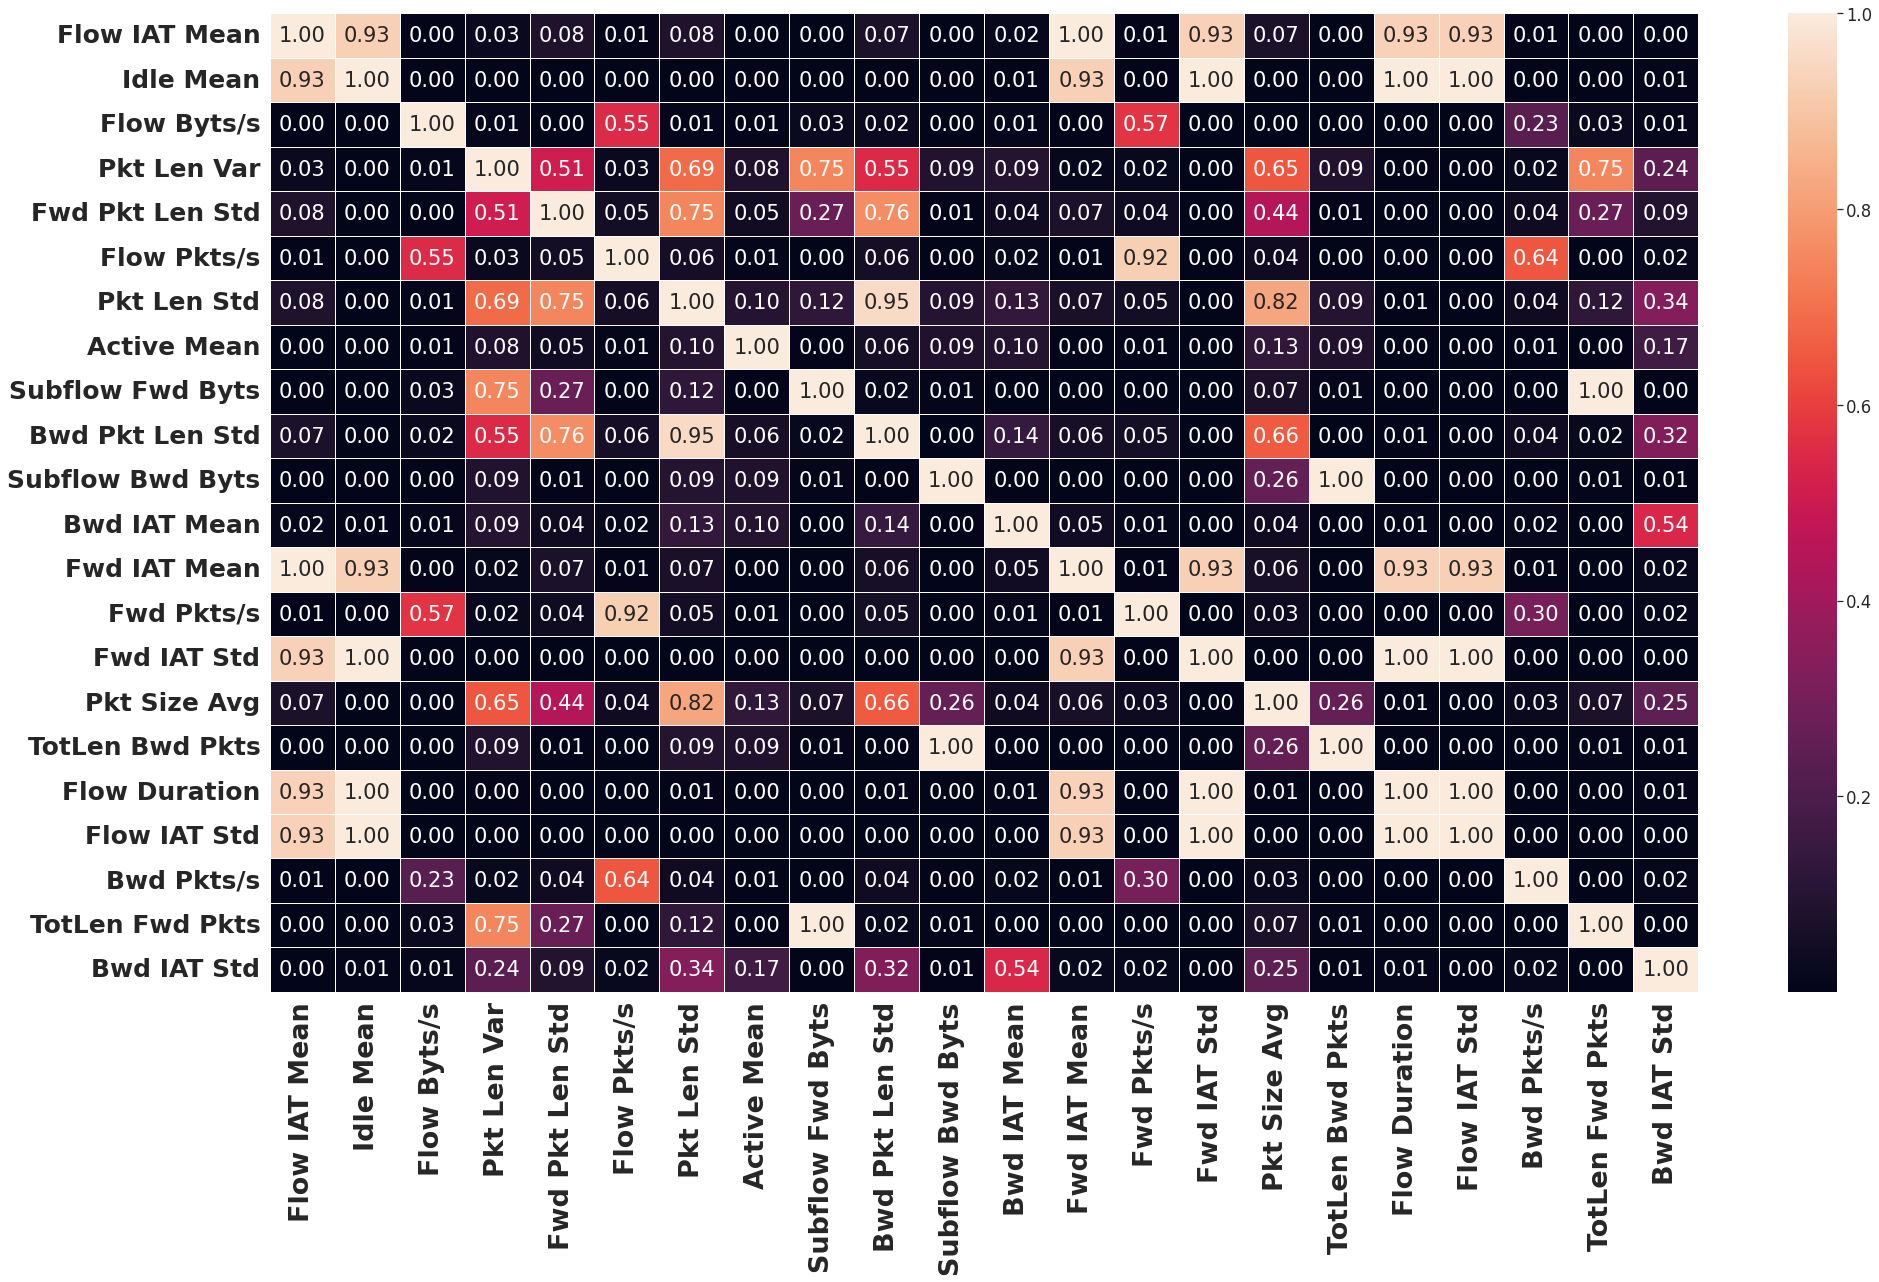

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns




f, ax = plt.subplots(figsize=(32, 18))
hmap = sns.heatmap(abs(toTrainModel.corr()), annot=True,
            linewidths=0.5, fmt='.2f', ax=ax, annot_kws={"fontsize":21})

for label in hmap.get_yticklabels():
    label.set_size(25)
    label.set_weight("bold")

for label in hmap.get_xticklabels():
    label.set_size(27)
    label.set_weight("bold")


Save label

In [28]:
labels = toTrainModel[LABEL]
toTrainModel = toTrainModel.drop([LABEL], axis=1)


In [29]:
def printNanFinite(data):
    print('Is any Nan:', np.any(np.isnan(data)))
    print('Is all finite:', np.all(np.isfinite(data)))


In [30]:
printNanFinite(toTrainModel)
print('\n')
printNanFinite(allDatasetToTest)


Is any Nan: False
Is all finite: True


Is any Nan: False
Is all finite: True


Scale numeric values

#### After preprocess

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    toTrainModel, labels, test_size=0.33, random_state=32)


# X_train.to_csv('X_train.csv')
# X_test.to_csv('X_test.csv')
# y_train.to_csv('y_train.csv')
# y_test.to_csv('y_test.csv')


In [32]:
isRFC = True
isMLPC = False
isSequential = False


In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense


def model():
    if isRFC:
        model = RandomForestClassifier(
            n_estimators=100, max_depth=5, min_samples_leaf=4)
    elif isMLPC:
        model = MLPClassifier(random_state=32)
    else:
        model = Sequential([
            Dense(256, activation='softplus', kernel_initializer='glorot_uniform',
                  input_dim=X_train.shape[1]),
            Dense(128, activation='softplus',
                  kernel_initializer='glorot_uniform'),
            Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid')
        ])

        model.compile(loss='binary_crossentropy',
                      optimizer='Adam')

    return model


In [34]:
model = model()


In [35]:
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=4)

In [36]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def confMatrix(yTrain, xTrainPreds, yTest, xTestPreds):
    # Your code here
    cmTrain = confusion_matrix(yTrain, xTrainPreds)
    X_train_disp = ConfusionMatrixDisplay(confusion_matrix=cmTrain)

    cmTest = confusion_matrix(yTest, xTestPreds)
    X_test_disp = ConfusionMatrixDisplay(confusion_matrix=cmTest)
    # End

    _, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=150)

    X_train_disp.plot(ax=ax[0])
    ax[0].set_title("Train")

    X_test_disp.plot(ax=ax[1])
    ax[1].set_title("Test")
    plt.show()


In [37]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score


def printScores(name, labels, predicts):
    print(name)
    print('Accuracy: %.3f ' % accuracy_score(labels, predicts))
    print('Precision: %.3f ' % precision_score(labels, predicts))
    print('Recall: %.3f' % recall_score(labels, predicts))
    print('F1 Score: %.3f' % f1_score(labels, predicts))
    print('\n')


In [38]:


X_train_preds = model.predict(X_train)
X_test_preds = model.predict(X_test)

if isSequential:
    print('Train auc:', roc_auc_score(y_train, X_train_preds))
    print('Test auc:', roc_auc_score(y_test, X_test_preds))
else:
    printScores('Train:', y_train, X_train_preds)
    printScores('Test:', y_test, X_test_preds)


Train:
Accuracy: 0.999 
Precision: 1.000 
Recall: 0.998
F1 Score: 0.999


Test:
Accuracy: 0.999 
Precision: 1.000 
Recall: 0.998
F1 Score: 0.999




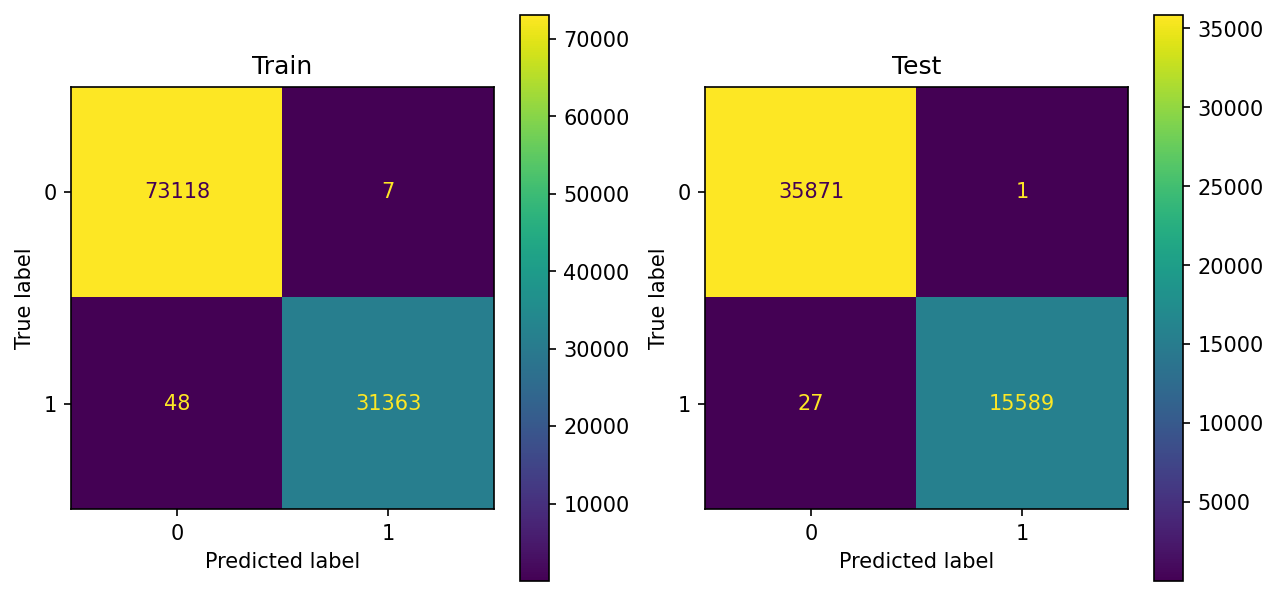

In [39]:
confMatrix(y_train, X_train_preds, y_test, X_test_preds)


In [40]:
allDatasetLabels = allDatasetToTest[LABEL]
allDatasetToTest = allDatasetToTest.drop([LABEL], axis=1)

# allDatasetLabels.to_csv('allDatasetLabels.csv')
# allDatasetToTest.to_csv('allDatasetToTest.csv')


In [41]:


AllDatasetPreds = model.predict(allDatasetToTest)

if isSequential:
    print('Auc:', roc_auc_score(allDatasetLabels, AllDatasetPreds))
else:
    printScores('All dataset:', allDatasetLabels, AllDatasetPreds)


All dataset:
Accuracy: 0.987 
Precision: 0.969 
Recall: 0.996
F1 Score: 0.983




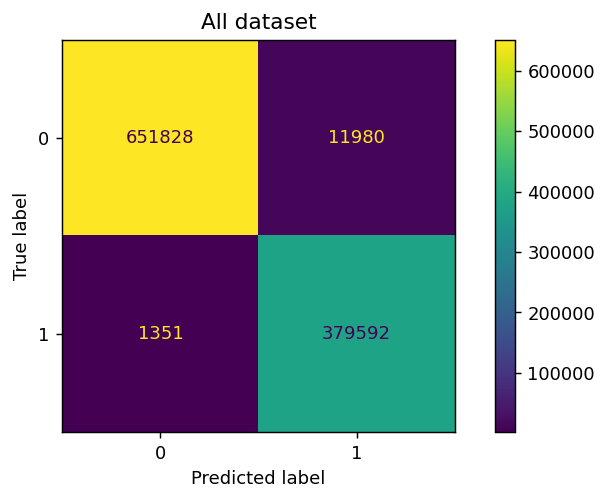

In [42]:
allDatasetConfusionMatrix = confusion_matrix(allDatasetLabels, AllDatasetPreds)
allDataSetMatrixDisplay = ConfusionMatrixDisplay(
    confusion_matrix=allDatasetConfusionMatrix)
_, ax = plt.subplots(figsize=(8, 4), dpi=130)
ax.set_title("All dataset")
allDataSetMatrixDisplay.plot(ax=ax)
plt.show()


In [43]:
selectedToSaveDataset.to_csv('FtpSshBruteForce.csv')
